In [19]:
# see http://logics-of-blue.com/python-time-series-analysis/ 
import numpy as np
import pandas as pd
from scipy import stats

# graph plot
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline 

# setting graph size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

# model 
import statsmodels.api as sm

In [6]:
# read data
dataNormal = pd.read_csv('AirPassengers.csv')
dataNormal.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [9]:
# read data as month : data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv' , index_col='Month',date_parser=dateparse, dtype='float')
data.head()

#Passengers
Month                  
1949-01-01        112.0
1949-02-01        118.0
1949-03-01        132.0
1949-04-01        129.0
1949-05-01        121.0

In [11]:
# setting data for plot
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

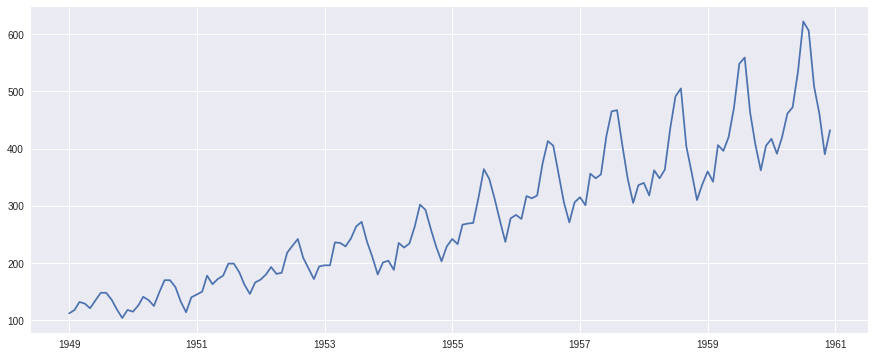

In [12]:
# plot data
plt.plot(ts)

In [13]:
# data-get-method 1
ts['1949-01-01']

112.0

In [14]:
# data-get-method 2
ts['1949']

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
Name: #Passengers, dtype: float64

In [15]:
# slide data
ts.shift().head()

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
Name: #Passengers, dtype: float64

In [16]:
# difference
diff = ts - ts.shift()
diff.head()

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: #Passengers, dtype: float64

In [17]:
# log difference
logDiff = np.log(ts) - np.log(ts.shift())

# remove NaN
logDiff.dropna().head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: #Passengers, dtype: float64

In [20]:
# Autocirrekation
ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
ts_acf

array([ 1.        ,  0.94804734,  0.87557484,  0.80668116,  0.75262542,
        0.71376997,  0.6817336 ,  0.66290439,  0.65561048,  0.67094833,
        0.70271992,  0.74324019,  0.76039504,  0.71266087,  0.64634228,
        0.58592342,  0.53795519,  0.49974753,  0.46873401,  0.44987066,
        0.4416288 ,  0.45722376,  0.48248203,  0.51712699,  0.53218983,
        0.49397569,  0.43772134,  0.3876029 ,  0.34802503,  0.31498388,
        0.28849682,  0.27080187,  0.26429011,  0.27679934,  0.2985215 ,
        0.32558712,  0.3370236 ,  0.30333486,  0.25397708,  0.21065534,
        0.17217092])

In [22]:
# Partial autocorrelation
ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
ts_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

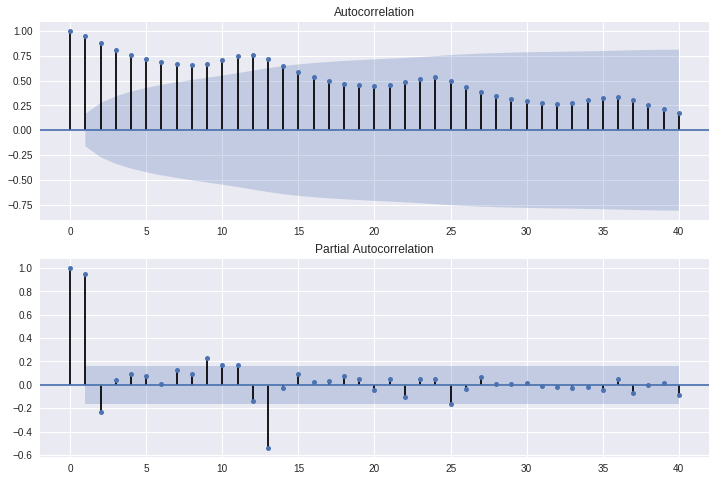

In [23]:
# plot autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)

In [24]:
# ARMA model prediction ... (This is self thought (not automatically)) ........................ <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
diff = ts - ts.shift()
diff = diff.dropna()
diff.head()
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: #Passengers, dtype: float64

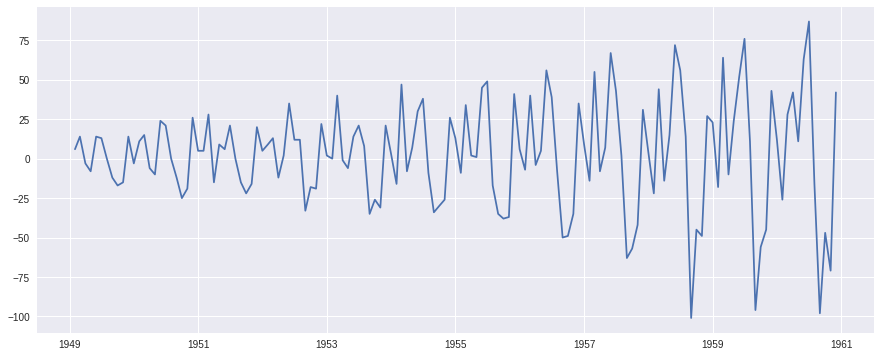

In [25]:
# difference plot
plt.plot(diff)

In [26]:
# automatically ARMA prediction functrion (for difference sequence)
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff
# search min_value

{'aic':              0            1            2
 0          NaN  1397.257791  1397.093436
 1  1401.852641  1412.615224  1385.496795
 2  1396.587654  1378.338024  1353.175744
 3  1395.021214  1379.614000  1351.138648
 4  1388.216680  1379.616584  1373.560615, 'aic_min_order': (3, 2)}

In [27]:
# we found P-3, q=2 automatically  
from statsmodels.tsa.arima_model import ARIMA
ARIMA_3_1_2 = ARIMA(ts, order=(3, 1, 2)).fit(dist=False) # "3"(ar) 1 (i) "2"(ma)
ARIMA_3_1_2.params

const                  2.673501
ar.L1.D.#Passengers    0.261992
ar.L2.D.#Passengers    0.367829
ar.L3.D.#Passengers   -0.363473
ma.L1.D.#Passengers   -0.075057
ma.L2.D.#Passengers   -0.924855
dtype: float64

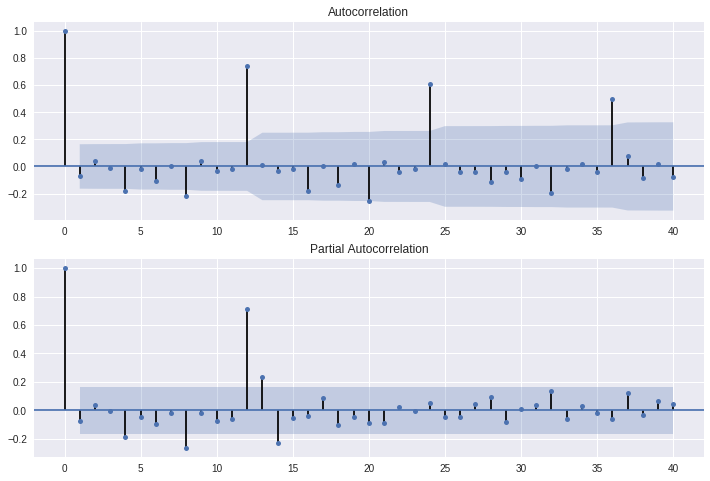

In [28]:
# check Residual error (... I think this is "White noise")
# this is not Arima ... (Periodicity remained)
resid = ARIMA_3_1_2.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [39]:
# predict SARIMA model  by  myself (not automatically) 
import statsmodels.api as sm

SARIMA_3_1_2_111 = sm.tsa.SARIMAX(ts, order=(3,1,2), seasonal_order=(1,1,1,12)).fit()
# order ... from ARIMA model // seasonal_order ... 1 1 1 ... ?  
print(SARIMA_3_1_2_111.summary())

# maybe use "Box-Jenkins method" ...
# https://github.com/statsmodels/statsmodels/issues/3620 for error

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 2)x(1, 1, 1, 12)   Log Likelihood                -502.991
Date:                            Sat, 22 Jul 2017   AIC                           1021.982
Time:                                    04:32:31   BIC                           1045.741
Sample:                                01-01-1949   HQIC                          1031.636
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5352   2.22e+08   2.41e-09      1.000   -4.35e+08    4.35e+08
ar.L2          0.2841   1.58e+08   

/home/elect/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


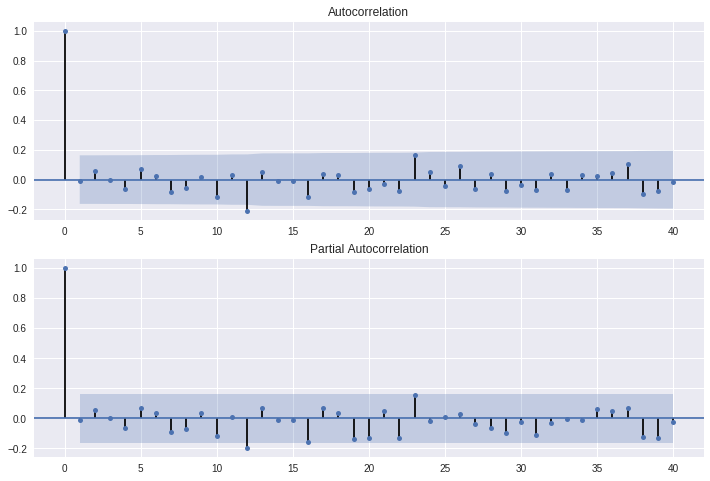

In [40]:
# check Residual error
residSARIMA = SARIMA_3_1_2_111.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

In [41]:
# prediction
pred = SARIMA_3_1_2_111.predict('1960-01-01', '1961-12-01')
print(pred)

1960-01-01    416.071446
1960-02-01    396.373010
1960-03-01    449.455383
1960-04-01    416.776366
1960-05-01    465.775806
1960-06-01    528.848591
1960-07-01    601.482604
1960-08-01    624.376682
1960-09-01    510.709503
1960-10-01    449.999414
1960-11-01    411.373042
1960-12-01    437.957346
1961-01-01    446.960832
1961-02-01    423.538727
1961-03-01    458.407418
1961-04-01    497.258892
1961-05-01    509.794842
1961-06-01    569.320628
1961-07-01    656.990576
1961-08-01    642.918688
1961-09-01    548.021153
1961-10-01    498.580483
1961-11-01    429.968363
1961-12-01    473.711394
Freq: MS, dtype: float64


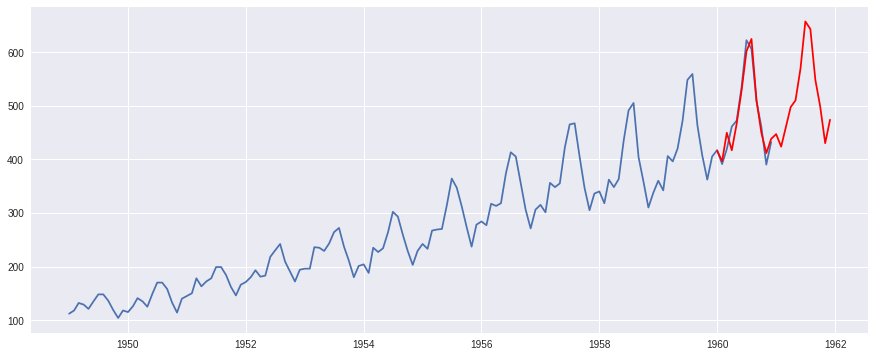

In [42]:
# plot real data and predict data 
plt.plot(ts)
plt.plot(pred, "r")

In [43]:
# SARIMA prediction (automatically) with AIC

max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [44]:
# Brute force method
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,12), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.ix[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.ix[num]["aic"] = sarima.aic
                        num = num + 1

/home/elect/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/elect/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
/home/elect/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/elect/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [45]:
modelSelection

model      aic
0    order=(1,0,0), season=(0,0,0)  1415.91
1    order=(1,0,0), season=(0,0,1)  1205.39
2    order=(1,0,0), season=(0,1,0)  1029.98
3    order=(1,0,0), season=(0,1,1)  944.385
4    order=(1,0,0), season=(1,0,0)  1017.32
5    order=(1,0,0), season=(1,0,1)  1007.03
6    order=(1,0,0), season=(1,1,0)  944.044
7    order=(1,0,0), season=(1,1,1)   945.44
8    order=(1,0,1), season=(0,0,0)  1390.45
9    order=(1,0,1), season=(0,0,1)  1192.29
10   order=(1,0,1), season=(0,1,0)  1014.25
11   order=(1,0,1), season=(0,1,1)  929.433
12   order=(1,0,1), season=(1,0,0)  1009.59
13   order=(1,0,1), season=(1,0,1)  989.176
14   order=(1,0,1), season=(1,1,0)  935.816
15   order=(1,0,1), season=(1,1,1)  935.915
16   order=(1,0,2), season=(0,0,0)  1381.52
17   order=(1,0,2), season=(0,0,1)  1282.03
18   order=(1,0,2), season=(0,1,0)  1009.29
19   order=(1,0,2), season=(0,1,1)  923.304
20   order=(1,0,2), season=(1,0,0)  1010.71
21   order=(1,0,2), season=(1,0,1)  984.278
22   order=(1,0,2), season=(1,1,0)  937.696
23   order=(1,0,2), season=(1,1,1)  929.569
24   order=(1,0,3), season=(0,0,0)  1354.88
25   order=(1,0,3), season=(0,0,1)  1304.41
26   order=(1,0,3), season=(0,1,0)   1000.8
27   order=(1,0,3), season=(0,1,1)  915.052
28   order=(1,0,3), season=(1,0,0)  1011.19
29   order=(1,0,3), season=(1,0,1)    979.4
..                             ...      ...
162  order=(3,1,0), season=(0,1,0)     1003
163  order=(3,1,0), season=(0,1,1)  931.842
164  order=(3,1,0), season=(1,0,0)  997.193
165  order=(3,1,0), season=(1,0,1)  983.289
166  order=(3,1,0), season=(1,1,0)  916.573
167  order=(3,1,0), season=(1,1,1)  916.807
168  order=(3,1,1), season=(0,0,0)  1353.66
169  order=(3,1,1), season=(0,0,1)   1167.2
170  order=(3,1,1), season=(0,1,0)  997.603
171  order=(3,1,1), season=(0,1,1)  918.466
172  order=(3,1,1), season=(1,0,0)  993.436
173  order=(3,1,1), season=(1,0,1)  983.852
174  order=(3,1,1), season=(1,1,0)  911.376
175  order=(3,1,1), season=(1,1,1)  912.343
176  order=(3,1,2), season=(0,0,0)     1352
177  order=(3,1,2), season=(0,0,1)  1142.78
178  order=(3,1,2), season=(0,1,0)  999.602
179  order=(3,1,2), season=(0,1,1)  913.457
180  order=(3,1,2), season=(1,0,0)   997.16
181  order=(3,1,2), season=(1,0,1)  985.713
182  order=(3,1,2), season=(1,1,0)  913.265
183  order=(3,1,2), season=(1,1,1)  914.041
184  order=(3,1,3), season=(0,0,0)  1337.23
185  order=(3,1,3), season=(0,0,1)  1135.07
186  order=(3,1,3), season=(0,1,0)  988.935
187  order=(3,1,3), season=(0,1,1)  898.105
188  order=(3,1,3), season=(1,0,0)  992.115
189  order=(3,1,3), season=(1,0,1)  966.208
190  order=(3,1,3), season=(1,1,0)  910.008
191  order=(3,1,3), season=(1,1,1)  903.239

[192 rows x 2 columns]

In [46]:
# min_AIC model
modelSelection[modelSelection.aic == min(modelSelection.aic)]

model      aic
187  order=(3,1,3), season=(0,1,1)  898.105

In [47]:
bestSARIMA = sm.tsa.SARIMAX(ts, order=(3,1,3), seasonal_order=(0,1,1,12), enforce_stationarity = False, enforce_invertibility = False).fit()

In [48]:
print(bestSARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(3, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -441.052
Date:                            Sat, 22 Jul 2017   AIC                            898.105
Time:                                    04:40:59   BIC                            921.863
Sample:                                01-01-1949   HQIC                           907.759
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2231   3336.897  -6.69e-05      1.000   -6540.420    6539.974
ar.L2         -0.1642   4448.806  -

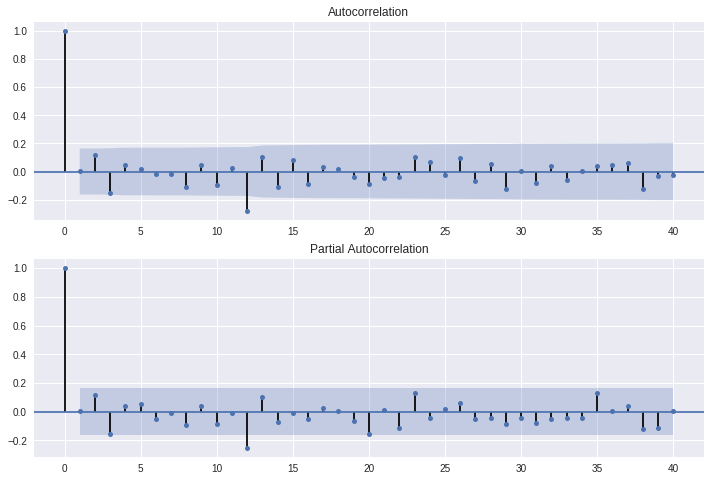

In [49]:
# check Residual error
residSARIMA = bestSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

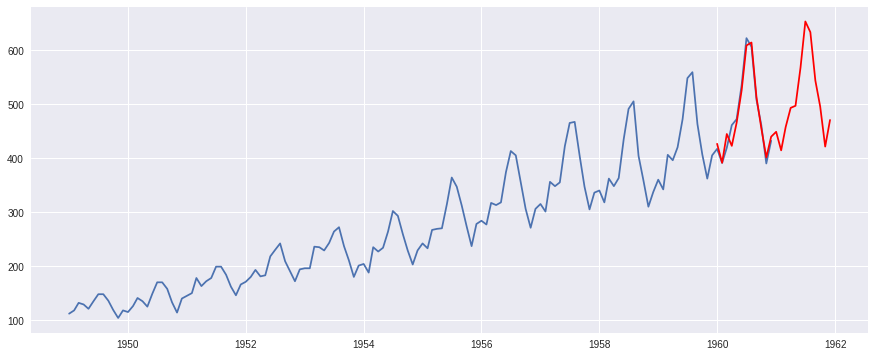

In [50]:
# prediction
bestPred = bestSARIMA.predict('1960-01-01', '1961-12-01')
# plot real data and predict data
plt.plot(ts)
plt.plot(bestPred, "r")